# Overview of Dataset

A real online retail transaction data set of two years.

Data Set Information:
This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

Attribute Information:
InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invoice date and time. Numeric. The day and time when a transaction was generated.

UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).

CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal. The name of the country where a customer resides.

# Import Required Libraries

In [38]:
#pip install apyori

In [39]:
import pandas as pd
import matplotlib.pyplot as plt


from apyori import apriori

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


In [40]:
retail_data = pd.read_csv('./online_retail.csv')

In [41]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [42]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [43]:
retail_data.shape

(541909, 8)

Besed on data description we have some canceled invoices.
InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

So we are going to remove canceled invoices.

In [54]:
retail_data['InvoiceNo'].str.startswith('c',na=False)

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: InvoiceNo, Length: 541909, dtype: bool

In [44]:
retail_data[retail_data['InvoiceNo'].str.startswith('C', na=False)]

In [45]:
not_canceled_retail_data = retail_data[~ retail_data['InvoiceNo'].str.startswith('C', na=False)]

- Remember:
The str.startswith('C', na=False) checks if the InvoiceNo starts with "C", and na=False ensures that NaN values are not considered.
The ~ operator negates the condition, selecting only rows where the InvoiceNo does not start with "C".
The resulting DataFrame will exclude all canceled invoices.

In [46]:
not_canceled_retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [47]:
not_canceled_retail_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532621 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    532621 non-null  object 
 1   StockCode    532621 non-null  object 
 2   Description  531167 non-null  object 
 3   Quantity     532621 non-null  int64  
 4   InvoiceDate  532621 non-null  object 
 5   UnitPrice    532621 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      532621 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.6+ MB


In [48]:
not_canceled_retail_data.shape

(532621, 8)

In [71]:
countrybase_retail = not_canceled_retail_data.groupby(['Country']).agg(
                     InvoiceCount = ('InvoiceNo', 'count'),
                     QuantityCount = ('Quantity', 'count'),
                     TotalPrice = ('UnitPrice', 'sum'),
                     Customers = ('CustomerID', 'count')).reset_index()
# See comments of code in Comment_of_course... .ipynb file

In [74]:
countrybase_retail.sort_values('TotalPrice', ascending=False, 
                               inplace=True, ignore_index=True)

# See comments of code in Comment_of_course... .ipynb file

In [ ]:
countrybase_retail

### Show Total Revenue By Top 10 Countries

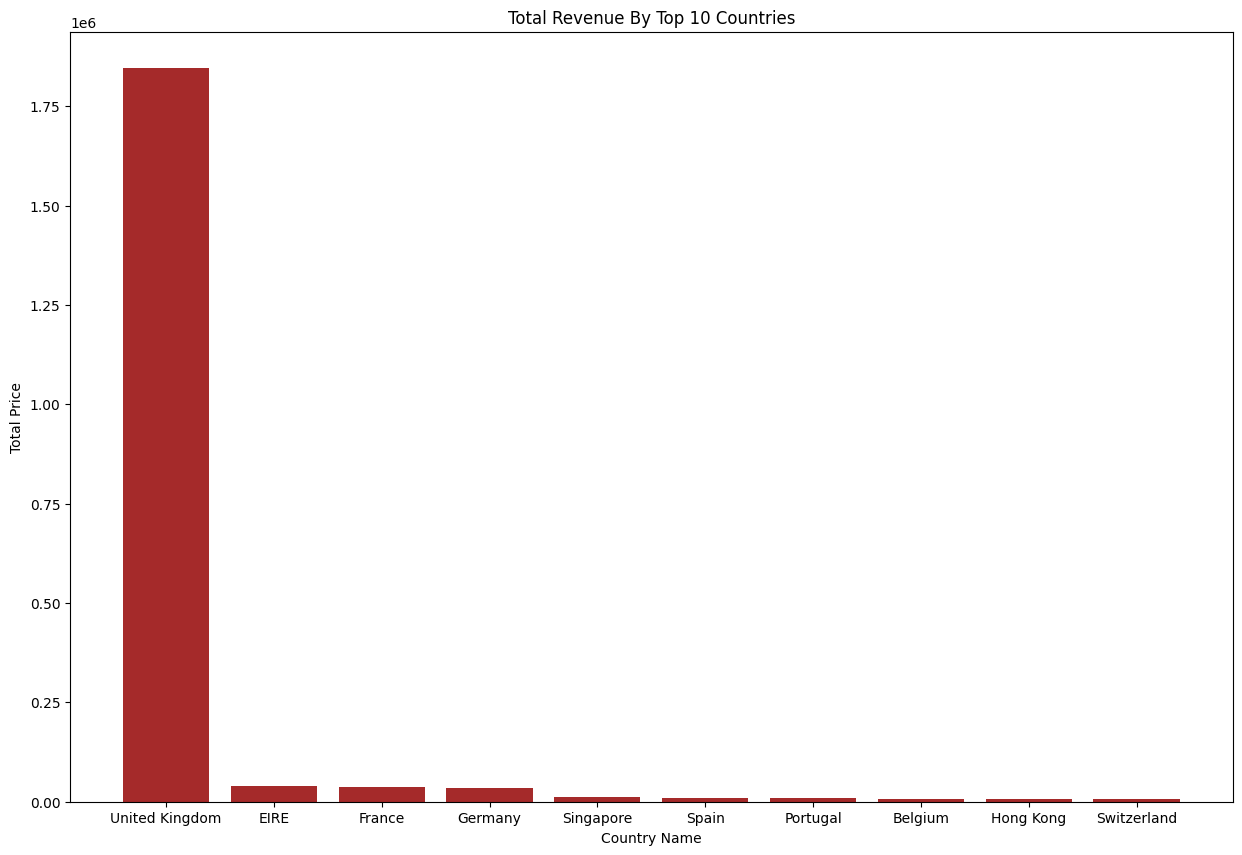

In [78]:
fig = plt.figure(figsize = (15, 10))
 
plt.bar(countrybase_retail['Country'].head(10), countrybase_retail['TotalPrice'].head(10), 
        color ='brown')
 
plt.title("Total Revenue By Top 10 Countries")
plt.xlabel("Country Name")
plt.ylabel("Total Price")
plt.show()

In [16]:
not_canceled_retail_data['StockCode'].value_counts()

85123A    3423
22423     2055
85099B    2015
21212     1920
21232     1714
          ... 
90080        1
20904        1
79157B       1
72331R       1
21120        1
Name: StockCode, Length: 4627, dtype: int64

In [17]:
not_canceled_retail_data['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    3456
REGENCY CAKESTAND 3 TIER              2046
STRAWBERRY CERAMIC TRINKET BOX        1714
PACK OF 72 RETRO SPOT CAKE CASES      1456
ASSORTED COLOUR BIRD ORNAMENT         1450
                                      ... 
LARGE HANGING GLASS+ZINC LANTERN         1
Dotcomgiftshop Gift Voucher £80.00       1
17129c                                   1
bad quality                              1
entry error                              1
Name: Description, Length: 4666, dtype: int64

# Prepare The Dataset

In [18]:
# Delete null values and change the type of 'Description' to string
not_canceled_retail_data = not_canceled_retail_data[~ not_canceled_retail_data['Description'].isna()]
not_canceled_retail_data['Description'] = not_canceled_retail_data['Description'].astype(str)

In [19]:
gb_retail_data = not_canceled_retail_data.groupby(['Invoice'])['Description'].apply(list).to_frame().reset_index()

In [20]:
gb_retail_data

,Invoice,Description
0,489434,"[15CM CHRISTMAS GLASS BALL 20 LIGHTS, PINK CHE..."
1,489435,"[CAT BOWL , DOG BOWL , CHASING BALL DESIGN, HE..."
2,489436,"[DOOR MAT BLACK FLOCK , LOVE BUILDING BLOCK WO..."
3,489437,"[CHRISTMAS CRAFT HEART DECORATIONS, CHRISTMAS ..."
4,489438,"[DINOSAURS WRITING SET , SET OF MEADOW FLOWE..."
...,...,...
21291,538170,"[ASSORTED COLOUR BIRD ORNAMENT, HAND WARMER BA..."
21292,538171,"[3 TIER SWEETHEART GARDEN SHELF, FIRST AID TIN..."
21293,A506401,[Adjust bad debt]
21294,A516228,[Adjust bad debt]


In [21]:
transactions = gb_retail_data['Description'].to_list()

# Build The Apriori Model

In [22]:
association_rules = apriori(transactions, 
                            min_support=0.01, 
                            min_confidence=0.2,
                            min_lift=3, 
                            min_length=2)

In [23]:
#Converting the associations to lists
rules = list(association_rules)

In [24]:
#Print out the number of rules
print(len(rules))

286


# Explore The Rules

In [25]:
number = 1
result_file = open('Rules.txt', 'w')

for rule in rules:
    pair = rule[0] 
    items = [x for x in pair]
    
    result_file.write("Rule #{}".format(number) + "\n")
    result_file.write("Antecedent: {} => Consequent: {}".format(items[0], items[1]) + "\n")
    result_file.write("Support: {}".format(str(rule[1])) + "\n")
    result_file.write("Confidence: {}".format(str(rule[2][0][2])) + "\n")
    result_file.write("Lift: {}".format(str(rule[2][0][3])) + "\n")
    result_file.write("====================================================="+"\n")
    
    print("Rule #{}".format(number))
    print("Antecedent: {} => Consequent: {}".format(items[0], items[1]))
    print("Support: {}".format(str(rule[1])))
    print("Confidence: {}".format(str(rule[2][0][2])))
    print("Lift: {}".format(str(rule[2][0][3])))
    print("=====================================================")
    number += 1
    
result_file.close()

Rule #1
Antecedent: PAPER CHAIN KIT VINTAGE CHRISTMAS => Consequent: 60 CAKE CASES VINTAGE CHRISTMAS
Support: 0.010236664162283996
Confidence: 0.461864406779661
Lift: 14.27556517674842
Rule #2
Antecedent: 60 CAKE CASES VINTAGE CHRISTMAS => Consequent: SET OF 20 VINTAGE CHRISTMAS NAPKINS
Support: 0.01117580766341097
Confidence: 0.5042372881355932
Lift: 20.222669092534073
Rule #3
Antecedent: 60 TEATIME FAIRY CAKE CASES => Consequent: 72 SWEETHEART FAIRY CAKE CASES
Support: 0.022163786626596543
Confidence: 0.3532934131736527
Lift: 8.638044233003567
Rule #4
Antecedent: 60 TEATIME FAIRY CAKE CASES => Consequent: PACK OF 60 DINOSAUR CAKE CASES
Support: 0.019675056348610068
Confidence: 0.313622754491018
Lift: 9.354215937872155
Rule #5
Antecedent: 60 TEATIME FAIRY CAKE CASES => Consequent: PACK OF 60 MUSHROOM CAKE CASES
Support: 0.013007137490608564
Confidence: 0.20733532934131738
Lift: 7.746338901145078
Rule #6
Antecedent: 60 TEATIME FAIRY CAKE CASES => Consequent: PACK OF 60 PINK PAISLEY CAK

# Good Luck ^-^